In [14]:
import sys
import os
# Sorry for this code : (
sys.path.append('../')

import numpy as np
from matplotlib import pyplot as plt


import loader

import importlib
importlib.reload(loader)

parent =  os.path.abspath("../")
path_to_hearts = os.path.join(parent, 'hearts')

In [45]:
sim_time_minutes = 18
cores = 10
sim_s_to_rl_m = 2 # Worst case scenario
max_buffer_size = 10_000
size_state = 8
size_action = 4
float_size = 8
sampling_frequency = 20

comp_time_minutes = sim_time_minutes * 60 * sim_s_to_rl_m
days = int((comp_time_minutes / 60) // 24)
hours = int((comp_time_minutes / 60) - (days * 24))
minutes = int(comp_time_minutes - (days * 24 * 60 + hours * 60))
seconds = int((comp_time_minutes * 60) - (days * 24 * 3600 + hours * 3600 + minutes * 60))

sim_data_hours = (sim_time_minutes * cores) / 60
tot_hours = comp_time_minutes / 60

mem_total_bytes = (size_state + size_action) * float_size * max_buffer_size * cores
mem_total_GB = mem_total_bytes / 1_000_000_000

samples_per_core = sim_time_minutes * 60 * sampling_frequency 
sampels_total = samples_per_core * cores

t_end = sim_time_minutes * 60 * 1_000

print(f"Total hours: {tot_hours}")
print(f"T_end: {t_end}")
print(f"Comp time: {days}-{hours}:{minutes}:{seconds}")
print(f"Required memory: {mem_total_GB} GB")
print(f"Available data: {sim_data_hours} hours")
print(f"Available samplese: {sampels_total}")

Total hours: 36.0
T_end: 1080000
Comp time: 1-12:0:0
Required memory: 0.0096 GB
Available data: 3.0 hours
Available samplese: 216000


ref_non_disturbed
ref_non_disturbed


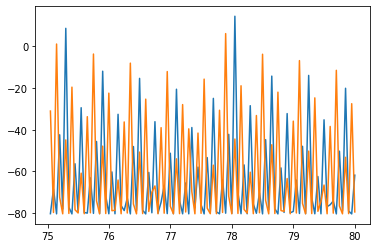

In [12]:
states, actions, t_start, t_end, par, name = load_experiment("ref_non_disturbed", newest=True)

uProbes = states
probeUndisturbed = states.T[1]
t = np.linspace(t_start, t_end, num=probeUndisturbed.size) / 1000

indicies = t > 75

plt.plot(t[indicies], states.T[1][indicies])
plt.plot(t[indicies], states.T[0][indicies])

ref_disturbed


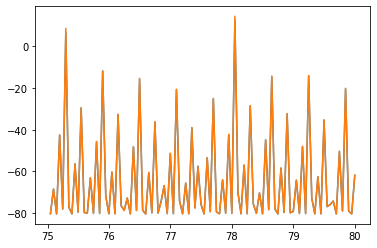

In [13]:
states, actions, t_start, t_end, par, _ = load_experiment("ref_disturbed")

dProbes = states
probeDisturbed = states.T[1]
t = np.linspace(t_start, t_end, num=probeDisturbed.size) / 1000

indicies = t > 75

plt.plot(t[indicies], probeDisturbed[indicies])
plt.plot(t[indicies], probeUndisturbed[indicies])

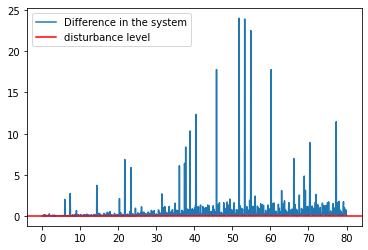

In [15]:
diffs = np.linalg.norm(dProbes - uProbes, axis=1)

N = 2
diffs_mean = np.convolve(diffs, np.ones(N)/N, mode='sane')

t = np.linspace(t_start, t_end, num=diffs.size) / 1_000
#plt.plot(t, diffs, label="actual")
plt.plot(t, diffs, label="Difference in the system")
plt.axhline(1e-3, color="red", label="disturbance level")
plt.legend()


(200, 8)


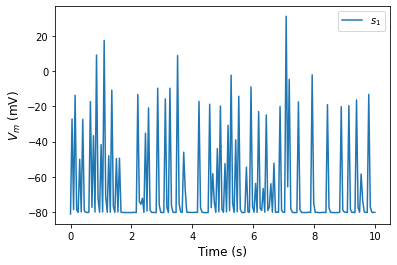

In [25]:
all_states, all_actions, t_start, t_end, par, name = loader.load_experiment(
    "peregrine",
    path_to_hearts
)

states = all_states[0]
actions = all_actions[0]

print(states.shape)
t = np.linspace(t_start, t_end, num=states.shape[0]) / 1000

indicies = (t > -1) & (t < 100000)

showcase = states.T
plt.xlabel("Time (s)", fontsize=12)
plt.ylabel("$V_m$ (mV)", fontsize=12)
plt.plot(t[indicies], showcase[2][indicies], label="$s_1$")
#plt.plot(t[indicies], showcase[2][indicies])
#plt.plot(t[indicies], showcase[1][indicies], label="$s_2$")
plt.legend()
# plt.savefig("../../Figures/ref-signal-example.pdf")

In [25]:
actions

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])